### Predict Loan Eligibility for Dream Housing Finance company

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('/content/train_ctrUa4K.csv')
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test_data = pd.read_csv('/content/test_lAUu6dG.csv')
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
train_data.shape

(614, 13)

In [7]:
train_data['Gender'].fillna(train_data['Gender'].mode().values[0],inplace=True)
train_data['Married'].fillna(train_data['Married'].mode().values[0],inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode().values[0],inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode().values[0],inplace=True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(),inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mean(),inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mean(),inplace=True)
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [9]:
test_data['Gender'].fillna(test_data['Gender'].mode().values[0],inplace=True)
test_data['Dependents'].fillna(test_data['Gender'].mode().values[0],inplace=True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode().values[0],inplace=True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean(),inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mean(),inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mean(),inplace=True)
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [10]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


Data Visualization

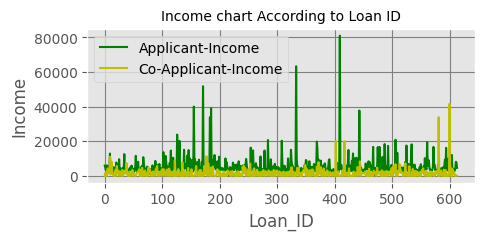

In [11]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
plt.figure(figsize=(5,2))
plt.plot(train_data.index,train_data['ApplicantIncome'],color="g",label="Applicant-Income")
plt.plot(train_data.index,train_data['CoapplicantIncome'],color="y",label="Co-Applicant-Income")
plt.grid(color="grey")
plt.xlabel("Loan_ID")
plt.ylabel("Income")
plt.title("Income chart According to Loan ID",fontsize=10)
plt.legend()
plt.show()

Label Encoding


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [13]:
train_data['Loan_ID']=encoder.fit_transform(train_data['Loan_ID'])
train_data['Gender']=encoder.fit_transform(train_data['Gender'])
train_data['Married']=encoder.fit_transform(train_data['Married'])
train_data['Dependents']=encoder.fit_transform(train_data['Dependents'])
train_data['Education']=encoder.fit_transform(train_data['Education'])
train_data['Self_Employed']=encoder.fit_transform(train_data['Self_Employed'])
train_data['Property_Area']=encoder.fit_transform(train_data['Property_Area'])
train_data['Loan_Status']=encoder.fit_transform(train_data['Loan_Status'])
train_data.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.000000,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.000000,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.000000,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.000000,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.000000,2,1
5,5,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.000000,2,1
6,6,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.000000,2,1
7,7,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.000000,1,0
8,8,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.000000,2,1
9,9,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.000000,1,0


In [14]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban


In [15]:
test_data['Loan_ID']=encoder.fit_transform(test_data['Loan_ID'])
test_data['Gender']=encoder.fit_transform(test_data['Gender'])
test_data['Married']=encoder.fit_transform(test_data['Married'])
test_data['Dependents']=encoder.fit_transform(test_data['Dependents'])
test_data['Education']=encoder.fit_transform(test_data['Education'])
test_data['Self_Employed']=encoder.fit_transform(test_data['Self_Employed'])
test_data['Property_Area']=encoder.fit_transform(test_data['Property_Area'])
test_data.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,2
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,2
3,3,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,2
4,4,1,0,0,1,0,3276,0,78.0,360.0,1.000000,2
5,5,1,1,0,1,1,2165,3422,152.0,360.0,1.000000,2
6,6,0,0,1,1,0,2226,0,59.0,360.0,1.000000,1
7,7,1,1,2,1,0,3881,0,147.0,360.0,0.000000,0
8,8,1,1,2,0,0,13633,0,280.0,240.0,1.000000,2
9,9,1,0,0,1,0,2400,2400,123.0,360.0,1.000000,1


In [16]:
test_data.shape

(367, 12)

In [17]:
train_data.shape

(614, 13)

Correlation


In [18]:
train_data.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974


Feature Extraction

In [19]:

x=train_data.drop(columns=['Loan_ID','Loan_Status'])
y=train_data['Loan_Status']
y_train=y.values

In [20]:
y_train

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [21]:
x_train=x.values
x_train

array([[  1.,   0.,   0., ..., 360.,   1.,   2.],
       [  1.,   1.,   1., ..., 360.,   1.,   0.],
       [  1.,   1.,   0., ..., 360.,   1.,   2.],
       ...,
       [  1.,   1.,   1., ..., 360.,   1.,   2.],
       [  1.,   1.,   2., ..., 360.,   1.,   2.],
       [  0.,   0.,   0., ..., 360.,   0.,   1.]])

In [22]:
x_test=test_data.drop(columns=['Loan_ID'])
x_test=x_test.values
x_test

array([[  1.        ,   1.        ,   0.        , ..., 360.        ,
          1.        ,   2.        ],
       [  1.        ,   1.        ,   1.        , ..., 360.        ,
          1.        ,   2.        ],
       [  1.        ,   1.        ,   2.        , ..., 360.        ,
          1.        ,   2.        ],
       ...,
       [  1.        ,   0.        ,   0.        , ..., 360.        ,
          0.82544379,   1.        ],
       [  1.        ,   1.        ,   0.        , ..., 360.        ,
          1.        ,   0.        ],
       [  1.        ,   0.        ,   0.        , ..., 180.        ,
          1.        ,   0.        ]])

Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

Using SVM classifier

In [24]:
from sklearn.svm import SVC
svc=SVC(kernel="linear",random_state=0)
svc.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [26]:
y_pred=svc.predict(x_test)

In [27]:
sample=pd.read_csv('/content/sample_submission_49d68Cx.csv')
sample.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [28]:
df=pd.DataFrame(y_pred,columns=["Loan_Status"])
df=df.replace(1,'Y')
df=df.replace(0,'N')
df.head()
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(df)

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y
5,Y
6,Y
7,N
8,Y
9,Y


In [29]:
sample=sample.drop(columns=['Loan_Status'],axis=1)
sample['Loan_Status']=df['Loan_Status']
sample.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [31]:
sample.to_csv("svc_1.csv",index=False)